# Doc2vec,Tsne,SpotifySongs,Genres,Langauges : Word embeddings (Document Embedding)

### Loading Libraries 

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from gensim.models import Doc2Vec
import gensim
from gensim.models.doc2vec import TaggedDocument

import re
import seaborn as sns
import matplotlib.pyplot as plt



# Erase Warnings
import warnings
warnings.filterwarnings("ignore")

### Data Loading and Description (EDA) 

In [3]:
# Loading Dataset

songs_df = pd.read_csv("./final_spotify_songs.csv")
songs_df.head(5)

track_id                                         track_name  \
0  0017A6SJgTbfQVU2EtsPNo                                           Pangarap   
1  004s3t0ONYlzxII9PLgU6z                                       I Feel Alive   
2  00chLpzhgVjxs1zKC9UScL                                             Poison   
3  00cqd6ZsSkLZqGMlQCR0Zo  Baby It's Cold Outside (feat. Christina Aguilera)   
4  00emjlCv9azBN0fzuuyLqy                                         Dumb Litty   

      track_artist                                             lyrics  \
0  Barbie's Cradle  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1    Steady Rollin  The trees, are singing in the wind The sky blu...   
2   Bell Biv DeVoe  NA Yeah, Spyderman and Freeze in full effect U...   
3      CeeLo Green  I really can't stay Baby it's cold outside I'v...   
4             KARD  Get up out of my business You don't keep me fr...   

   track_popularity          track_album_id  \
0                41  1srJQ0njEQgd8w4XSqI4JQ   
1                28  3z04Lb9Dsilqw68SHt6jLB   
2                 0  6oZ6brjB8x3GoeSYdwJdPc   
3                41  3ssspRe42CXkhPxdc12xcp   
4                65  7h5X3xhh3peIK9Y0qI5hbK   

                       track_album_name track_album_release_date  \
0                                  Trip               2001-01-01   
1                           Love & Loss               2017-11-21   
2                                  Gold               2005-01-01   
3                  CeeLo's Magic Moment               2012-10-29   
4  KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   

                                       playlist_name             playlist_id  \
0                                 Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                  Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                                     Christmas Soul  6FZYc2BvF7tColxO8PBShV   
4                                  K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   

   ... loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...  -10.068    1       0.0236       0.27900           0.01170    0.0887   
1  ...   -4.739    1       0.0442       0.01170           0.00994    0.3470   
2  ...   -7.504    0       0.2160       0.00432           0.00723    0.4890   
3  ...   -5.819    0       0.0341       0.68900           0.00000    0.0664   
4  ...   -1.993    1       0.0409       0.03700           0.00000    0.1380   

   valence    tempo  duration_ms  language  
0    0.566   97.091       235440        tl  
1    0.404  135.225       373512        en  
2    0.650  111.904       262467        en  
3    0.405  118.593       243067        en  
4    0.240  130.018       193160        en  

[5 rows x 25 columns]

In [4]:
songs_df.shape

(18454, 25)

In [5]:
songs_df.describe()

track_popularity  danceability        energy           key  \
count      18454.000000  18454.000000  18454.000000  18454.000000   
mean          42.438821      0.644066      0.692289      5.342094   
std           24.616740      0.150071      0.180635      3.613121   
min            0.000000      0.098500      0.016700      0.000000   
25%           24.000000      0.546000      0.573000      2.000000   
50%           48.000000      0.660000      0.715000      6.000000   
75%           62.000000      0.755000      0.835000      9.000000   
max          100.000000      0.979000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  18454.000000  18454.000000  18454.000000  18454.000000   
mean      -6.769159      0.580525      0.106192      0.175348   
std        2.920757      0.493487      0.102291      0.217795   
min      -34.283000      0.000000      0.022400      0.000001   
25%       -8.249000      0.000000      0.039700      0.016100   
50%       -6.227000      1.000000      0.060300      0.081900   
75%       -4.719000      1.000000      0.130000      0.254000   
max        1.275000      1.000000      0.918000      0.992000   

       instrumentalness      liveness       valence         tempo  \
count      18454.000000  18454.000000  18454.000000  18454.000000   
mean           0.051216      0.189593      0.520598    120.812167   
std            0.168263      0.153751      0.228716     27.586424   
min            0.000000      0.009360      0.000010     37.114000   
25%            0.000000      0.092700      0.345000     98.856000   
50%            0.000009      0.128000      0.522000    120.045000   
75%            0.001720      0.246000      0.700000    135.984000   
max            0.987000      0.996000      0.991000    214.047000   

         duration_ms  
count   18454.000000  
mean   230319.306763  
std     57255.086685  
min     31893.000000  
25%    193230.250000  
50%    221340.000000  
75%    258078.250000  
max    517810.000000

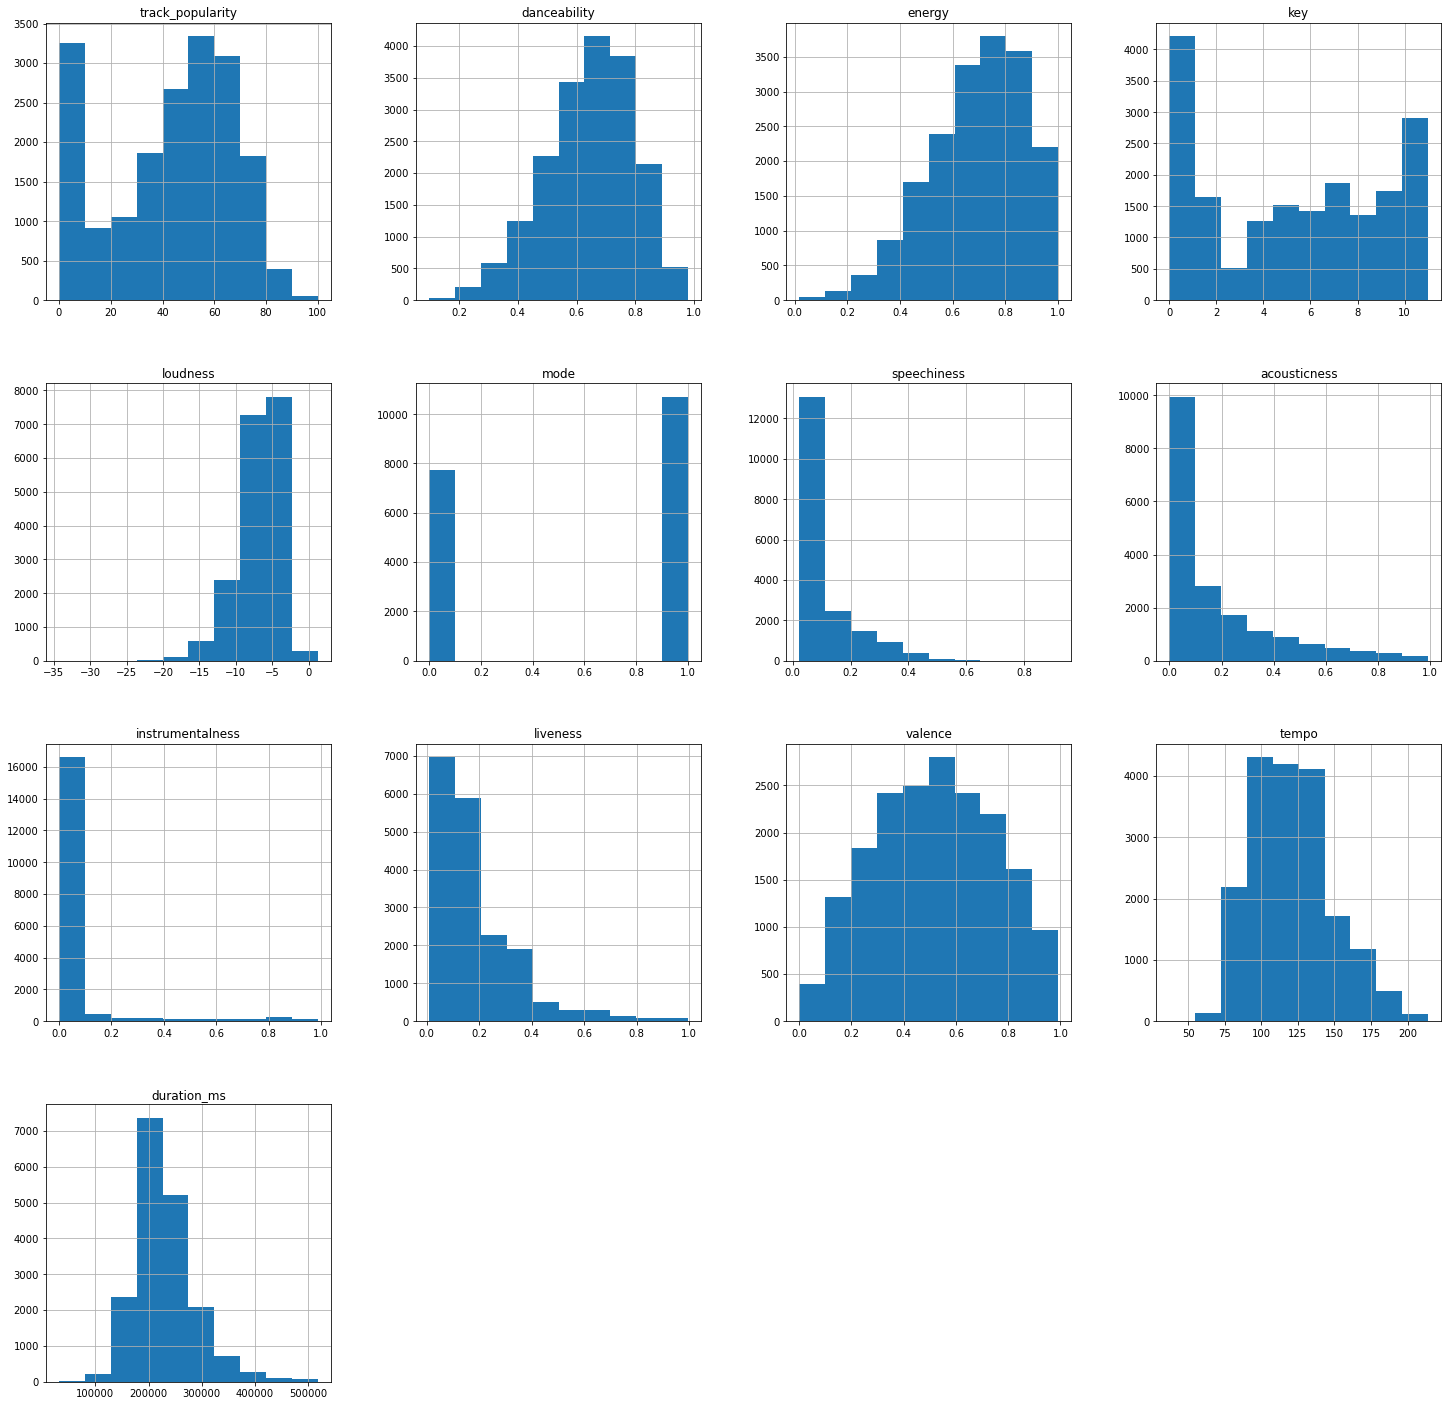

In [6]:
# plotting histograms
songs_df.hist(figsize=(25,25));

In [7]:
songs_df.corr()

track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.061499 -0.093521 -0.006878   
danceability              0.061499      1.000000 -0.089708  0.002090   
energy                   -0.093521     -0.089708  1.000000  0.018833   
key                      -0.006878      0.002090  0.018833  1.000000   
loudness                  0.031290      0.022830  0.674795  0.007280   
mode                      0.010947     -0.078020 -0.009903 -0.169589   
speechiness              -0.000622      0.204041 -0.011986  0.026282   
acousticness              0.076821     -0.029240 -0.546033 -0.002067   
instrumentalness         -0.080933     -0.049187  0.042093  0.004243   
liveness                 -0.059334     -0.114719  0.156931  0.000682   
valence                  -0.004490      0.343419  0.207941  0.021927   
tempo                     0.011954     -0.201465  0.138291 -0.018967   
duration_ms              -0.143970     -0.133803 -0.021134  0.016984   

                  loudness      mode  speechiness  acousticness  \
track_popularity  0.031290  0.010947    -0.000622      0.076821   
danceability      0.022830 -0.078020     0.204041     -0.029240   
energy            0.674795 -0.009903    -0.011986     -0.546033   
key               0.007280 -0.169589     0.026282     -0.002067   
loudness          1.000000 -0.035276     0.029858     -0.370628   
mode             -0.035276  1.000000    -0.070013      0.022191   
speechiness       0.029858 -0.070013     1.000000     -0.000217   
acousticness     -0.370628  0.022191    -0.000217      1.000000   
instrumentalness -0.099164 -0.002906    -0.108365     -0.015803   
liveness          0.071159  0.004850     0.060072     -0.067491   
valence           0.050211 -0.009382     0.035202     -0.069817   
tempo             0.082558  0.026421     0.033620     -0.096149   
duration_ms      -0.159026  0.012433    -0.094343     -0.052996   

                  instrumentalness  liveness   valence     tempo  duration_ms  
track_popularity         -0.080933 -0.059334 -0.004490  0.011954    -0.143970  
danceability             -0.049187 -0.114719  0.343419 -0.201465    -0.133803  
energy                    0.042093  0.156931  0.207941  0.138291    -0.021134  
key                       0.004243  0.000682  0.021927 -0.018967     0.016984  
loudness                 -0.099164  0.071159  0.050211  0.082558    -0.159026  
mode                     -0.002906  0.004850 -0.009382  0.026421     0.012433  
speechiness              -0.108365  0.060072  0.035202  0.033620    -0.094343  
acousticness             -0.015803 -0.067491 -0.069817 -0.096149    -0.052996  
instrumentalness          1.000000 -0.000021 -0.103020  0.028126     0.078505  
liveness                 -0.000021  1.000000 -0.006931  0.015658     0.026988  
valence                  -0.103020 -0.006931  1.000000 -0.017101    -0.045546  
tempo                     0.028126  0.015658 -0.017101  1.000000    -0.014873  
duration_ms               0.078505  0.026988 -0.045546 -0.014873     1.000000

In [8]:
 songs_df.corr().style.background_gradient(cmap = 'PRGn')  

In [8]:
songs_df.shape, songs_df.columns, songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

((18454, 25),
 Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
        'track_album_id', 'track_album_name', 'track_album_release_date',
        'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'language'],
       dtype='object'),
 None)

In [9]:
#check null values
pd.isnull(songs_df).sum()

track_id                      0
track_name                    0
track_artist                  0
lyrics                      260
track_popularity              0
track_album_id                0
track_album_name              0
track_album_release_date      0
playlist_name                 0
playlist_id                   0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64

In [10]:
songs_df.playlist_subgenre.drop_duplicates() 

0                  classic rock
1                     hard rock
2                new jack swing
3                      neo soul
4                     dance pop
5            urban contemporary
8                      big room
9                       hip pop
10                    latin pop
11              indie poptimism
13                 gangster rap
15                   album rock
17                post-teen pop
23                         trap
24                latin hip hop
27             southern hip hop
28                     tropical
29                   electropop
31    progressive electro house
32                      pop edm
44                    reggaeton
47                      hip hop
54               permanent wave
94                electro house
Name: playlist_subgenre, dtype: object

### Combining genres + lyrics + languages and creating a fetured document

In [11]:
df = pd.read_csv('final_spotify_songs.csv')
df = df[['playlist_genre','lyrics','language']]

df.head(10)

playlist_genre                                             lyrics language
0           rock  Minsan pa Nang ako'y napalingon Hindi ko alam ...       tl
1           rock  The trees, are singing in the wind The sky blu...       en
2            r&b  NA Yeah, Spyderman and Freeze in full effect U...       en
3            r&b  I really can't stay Baby it's cold outside I'v...       en
4            pop  Get up out of my business You don't keep me fr...       en
5            r&b  Hold your breath, don't look down, keep trying...       en
6            r&b  All I want is somebody who's gonna love me for...       en
7            r&b  Feels good Everybody Tender lover Tender love ...       en
8            edm  Don't run away, it's getting colder Our hearts...       en
9            r&b  Ho una cosa da dirti da tempo Ma  non ho mai t...       it

In [12]:
df["new_column"] = df['playlist_genre'].astype(str) +"-"+ df["lyrics"]+"-"+ df["language"]
print(df)

      playlist_genre                                             lyrics  \
0               rock  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1               rock  The trees, are singing in the wind The sky blu...   
2                r&b  NA Yeah, Spyderman and Freeze in full effect U...   
3                r&b  I really can't stay Baby it's cold outside I'v...   
4                pop  Get up out of my business You don't keep me fr...   
...              ...                                                ...   
18449            edm  Caught up in such a head rush, wide-eyed latel...   
18450            pop  My anaconda don't, my anaconda don't My anacon...   
18451            r&b  Bound, bound Bound, bound Bound to fall in lov...   
18452            r&b  (Would you do for me) Sweetheart (Would you do...   
18453           rock  Oo nga pala, hindi nga pala tayo Hanggang dito...   

      language                                         new_column  
0           tl  rock-Minsan pa 

In [13]:
df["lyrics"]=df["new_column"]

In [14]:
df["lyrics"][5]

"r&b-Hold your breath, don't look down, keep trying Darling, it's okay to be scared, it's frightening At times it just feels like the world is trying hard to knock us down But there's a reason that we're still here but no one else is around How we've grown Every single day I'm proud I swear, I won't Let anything stop us now I'm not a soldier But I'll fight through our darkest of days Get on my shoulders And I'll carry you all of the way'Cause there's no life worth living in If you're not with me in it I'm not a soldier But you make me wanna be brave Yeah, you do Through the depths of despair, we've stumbled And all that distance between us, we've crumbled We've ignored all of the rumours and jealous disapprovals And we've come out the other side with something beautiful Oh, how we've grown Every single day I'm proud And now I know There's nothing that can stop us now I'm not a soldier But I'll fight through our darkest of days Get on my shoulders And I'll carry you all of the way 'Caus

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

playlist_genre    0
lyrics            0
language          0
new_column        0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18194 entries, 0 to 18453
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playlist_genre  18194 non-null  object
 1   lyrics          18194 non-null  object
 2   language        18194 non-null  object
 3   new_column      18194 non-null  object
dtypes: object(4)
memory usage: 710.7+ KB


In [18]:
df.shape

(18194, 4)

In [19]:
df.index = range(18194)
df['lyrics'].apply(lambda x: len(x.split(' '))).sum()

7748768

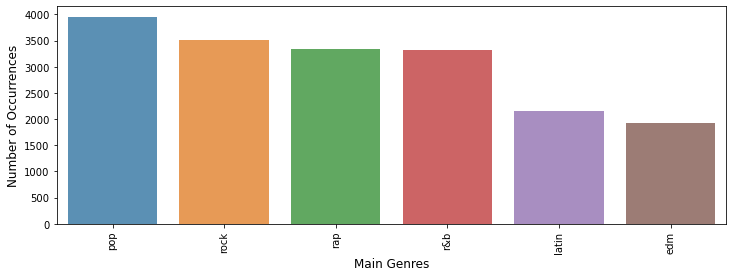

In [20]:
cnt_pro = df['playlist_genre'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Main Genres', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [21]:
def print_complaint(index):
    example = df[df.index == index][['lyrics', 'playlist_genre']].values[0]
    if len(example) > 0:
        print(example[0])
        print('playlist_genre:', example[1])
        
print_complaint(2)

r&b-NA Yeah, Spyderman and Freeze in full effect Uh-huh You ready, Ron? I'm ready You ready, Biv? I'm ready, Slick, are you? Oh, yeah, break it down NA Girl, I, must (warn you) I sense something strange in my mind Situation is (serious) Let's cure it cause we're running out of time It's oh, so (beautiful) Relationships they seem from the start It's all so (deadly) When love is not together from the heart It's drivin' me out of my mind! That's why it's HARD for me to find Can't get it out of my head! Miss her, kiss her, love her(Wrong move you're dead!) That girl is (poison)...Never trust a big butt and smile That girl is (poison)..("POISON!!") NA (-caution) Before I start to meet a fly girl, you know? Cause in some (portions) You'll think she's the best thing in the world She's so - (fly) She'll drive you right out of your mind And steal your heart when you're blind Beware she's schemin', she'll make you think you're dreamin' YOU'LL fall in love and you'll be screamin', demon, HOO.. Po

In [23]:
from bs4 import BeautifulSoup
def cleanText(text):
    #text = BeautifulSoup(text, "lxml").text
    #text = re.sub(r'\|\|\|', r' ', text) 
    #text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace(' ', '')
    return text
df['lyrics'] = df['lyrics'].apply(cleanText)

df['lyrics'][2]

'r&b-nayeah,spydermanandfreezeinfulleffectuh-huhyouready,ron?i\'mreadyyouready,biv?i\'mready,slick,areyou?oh,yeah,breakitdownnagirl,i,must(warnyou)isensesomethingstrangeinmymindsituationis(serious)let\'scureitcausewe\'rerunningoutoftimeit\'soh,so(beautiful)relationshipstheyseemfromthestartit\'sallso(deadly)whenloveisnottogetherfromtheheartit\'sdrivin\'meoutofmymind!that\'swhyit\'shardformetofindcan\'tgetitoutofmyhead!missher,kissher,loveher(wrongmoveyou\'redead!)thatgirlis(poison)...nevertrustabigbuttandsmilethatgirlis(poison)..("poison!!")na(-caution)beforeistarttomeetaflygirl,youknow?causeinsome(portions)you\'llthinkshe\'sthebestthingintheworldshe\'sso-(fly)she\'lldriveyourightoutofyourmindandstealyourheartwhenyou\'reblindbewareshe\'sschemin\',she\'llmakeyouthinkyou\'redreamin\'you\'llfallinloveandyou\'llbescreamin\',demon,hoo..poison,deadly,movin\'inslowlookinforamellowfellowlikedevoegettinpaid,laid,sobetterlaylowscheminonhouse,money,andthewholeshowthelowprohoshe\'llbecutlikeanaaa-f

##### Removing stopwords (eliminate unimportant words, allowing applications to focus on the important words instead)

In [24]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens


train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lyrics']), tags=[r.playlist_genre]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lyrics']), tags=[r.playlist_genre]), axis=1)

In [25]:
train_tagged.values[2]

TaggedDocument(words=['pop-iwokeup', "itwas7iwaited'til11justtofigureoutthatnoonewouldcallithinki'vegotalotoffriends", "butidon'thearfromthemwhat'sanothernightallalone", "whenyou'respendingeverydayonyourownandhereitgoesi'mjustakidandlifeisanightmarei'mjustakid", "iknowthatit'snotfairnobodycares", "'causei'maloneandtheworldishavingmorefunthanmetonightandmaybewhenthenightisdeadi'llcrawlintomybedi'mstaringatthesefourwallsagaini'lltrytothinkaboutthelasttimeihadagoodtimeeveryone'sgotsomewheretogoandthey'regonnaleavemehereonmyownandhereitgoesi'mjustakidandlifeisanightmarei'mjustakid", "iknowthatit'snotfairnobodycares", "'causei'maloneandtheworldishavingmorefunthanmewhatthehelliswrongwithme", "don'tfitinwithanybodyhowdidthishappentome", "wideawakei'mboredandican'tfallasleepandeverynightistheworstnighteveri'mjustakid", "i'mjustakidi'mjustakid", "i'mjustakidyeah", "i'mjustakidi'mjustakid", "i'mjustakidandi'mjustakidi'mjustakid", "i'mjustakidi'mjustakidandlifeisanightmarei'mjustakid", "iknowthat

In [26]:
import multiprocessing
cores = multiprocessing.cpu_count()

#### Document embeddings with Doc2Vec (extension of Word2vec) 

In [27]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████| 12735/12735 [00:00<00:00, 851321.45it/s]


In [28]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=10)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████| 12735/12735 [00:00<00:00, 798076.49it/s]


CPU times: total: 16min 18s
Wall time: 10min 27s


In [29]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

#target-output
#regressor-ip,and pushing,vector is stored

In [30]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)


#ytrain-labels or ouput
#xtrain-training input

In [31]:
X_train[0]

array([ 1.5936081e-03, -2.7636578e-04,  9.8619424e-04,  1.2428983e-03,
        1.2271315e-03, -6.5019249e-04, -1.1741645e-03,  5.1704346e-04,
       -7.4768421e-04, -3.4535100e-04,  6.3888449e-04, -8.0368418e-04,
       -3.5100122e-04, -1.1297136e-03,  8.6541037e-04,  4.9832859e-05,
       -8.3165604e-04,  7.5312314e-04, -1.4455350e-03,  2.5312067e-04,
       -1.1288680e-03, -1.4950032e-03,  1.2994074e-03,  7.6124293e-04,
        1.1570823e-03, -1.5094348e-03,  3.6717136e-04,  3.4868400e-04,
        1.2809002e-03, -9.7379141e-04, -1.6582429e-03,  1.5993498e-03,
       -7.5933734e-05,  1.4353825e-03,  1.1271946e-03,  3.5257579e-04,
       -1.2010867e-03, -1.1727992e-03, -1.2984866e-03,  3.1732937e-04,
       -6.0902495e-04, -1.3577753e-03,  1.5540665e-03,  6.0994487e-04,
        1.4464625e-03, -1.2942270e-03,  1.3785919e-03,  2.4762293e-04,
        7.8535121e-04,  6.8205933e-04,  4.7851008e-04, -1.1482354e-03,
       -5.6209246e-04,  1.3693174e-06, -1.0199808e-03, -5.1630568e-04,
      

#### K Means Clustering

In [36]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++',random_state=49)
model.fit(X_train)

KMeans(n_clusters=6, random_state=49)

In [37]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [38]:
cluster_center

array([[ 0.41372339,  0.01364503,  0.46993739, ...,  0.69568102,
         0.179867  , -0.04052979],
       [ 0.14603055,  0.01389608,  0.17842913, ...,  0.24189193,
         0.0627121 ,  0.00840998],
       [ 0.26890895,  0.02007877,  0.33151416, ...,  0.451304  ,
         0.12066662, -0.00393998],
       [ 0.32981049,  0.02002648,  0.40719582, ...,  0.57435666,
         0.14976886, -0.01794263],
       [ 0.47798431,  0.01162131,  0.50633085, ...,  0.80712424,
         0.21855196, -0.06290951],
       [ 0.016228  ,  0.00122328,  0.01963611, ...,  0.02550616,
         0.00678727,  0.00131736]])

In [39]:
labels

array([5, 4, 2, ..., 4, 4, 4])

In [40]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X_train, labels, metric='euclidean')

In [41]:
silhouette_score

0.29135087

In [42]:
import numpy as np

In [43]:
data_point=cluster_center[1]

In [44]:
centroid=cluster_center[2]

In [45]:
distance = np.sqrt(np.sum((data_point - centroid)**2))

In [46]:
distance

2.519384702976088

In [47]:
data_point=cluster_center[2]
centroid=X_train[4]
distance = np.sqrt(np.sum((data_point - centroid)**2))
distance

0.9013409933288634

In [48]:
cluster_center[1]

array([ 1.46030547e-01,  1.38960843e-02,  1.78429133e-01,  5.20802923e-02,
        1.83418019e-01,  6.19762727e-02,  1.61748442e-01,  5.94741383e-03,
        8.28885086e-02,  9.56047503e-02,  1.55623824e-01,  1.16479264e-01,
        1.77035241e-01, -3.46406738e-01, -7.21150692e-02,  2.80856449e-01,
       -1.43307597e-01,  5.03068097e-02, -1.45445340e-01,  9.40245525e-02,
       -9.00228026e-02, -3.29297271e-02,  6.27969157e-02, -4.00473228e-01,
       -3.16682071e-01, -4.33438851e-02, -3.06550319e-03,  1.70474986e-01,
       -1.02599170e-01,  1.44511681e-01,  1.03837937e-01,  5.83940207e-02,
       -8.54521163e-02, -1.74639005e-01, -2.36567555e-02,  2.48348217e-02,
       -1.66300785e-01,  2.13985114e-01, -6.19748927e-02,  8.07955274e-02,
       -3.69784565e-02, -1.88695017e-01,  3.18837587e-01, -2.37061584e-01,
        2.62559907e-01,  1.03049274e-01,  1.92399084e-01,  4.50809772e-02,
       -3.08950278e-01, -4.01134298e-01,  2.93278595e-01, -1.00427959e-01,
        1.73485052e-01, -

In [49]:
X_train[0]

array([ 1.5936081e-03, -2.7636578e-04,  9.8619424e-04,  1.2428983e-03,
        1.2271315e-03, -6.5019249e-04, -1.1741645e-03,  5.1704346e-04,
       -7.4768421e-04, -3.4535100e-04,  6.3888449e-04, -8.0368418e-04,
       -3.5100122e-04, -1.1297136e-03,  8.6541037e-04,  4.9832859e-05,
       -8.3165604e-04,  7.5312314e-04, -1.4455350e-03,  2.5312067e-04,
       -1.1288680e-03, -1.4950032e-03,  1.2994074e-03,  7.6124293e-04,
        1.1570823e-03, -1.5094348e-03,  3.6717136e-04,  3.4868400e-04,
        1.2809002e-03, -9.7379141e-04, -1.6582429e-03,  1.5993498e-03,
       -7.5933734e-05,  1.4353825e-03,  1.1271946e-03,  3.5257579e-04,
       -1.2010867e-03, -1.1727992e-03, -1.2984866e-03,  3.1732937e-04,
       -6.0902495e-04, -1.3577753e-03,  1.5540665e-03,  6.0994487e-04,
        1.4464625e-03, -1.2942270e-03,  1.3785919e-03,  2.4762293e-04,
        7.8535121e-04,  6.8205933e-04,  4.7851008e-04, -1.1482354e-03,
       -5.6209246e-04,  1.3693174e-06, -1.0199808e-03, -5.1630568e-04,
      

In [50]:
x1=list(X_train)

In [51]:
plot_list1=[]

In [52]:
cluster_center

array([[ 0.41372339,  0.01364503,  0.46993739, ...,  0.69568102,
         0.179867  , -0.04052979],
       [ 0.14603055,  0.01389608,  0.17842913, ...,  0.24189193,
         0.0627121 ,  0.00840998],
       [ 0.26890895,  0.02007877,  0.33151416, ...,  0.451304  ,
         0.12066662, -0.00393998],
       [ 0.32981049,  0.02002648,  0.40719582, ...,  0.57435666,
         0.14976886, -0.01794263],
       [ 0.47798431,  0.01162131,  0.50633085, ...,  0.80712424,
         0.21855196, -0.06290951],
       [ 0.016228  ,  0.00122328,  0.01963611, ...,  0.02550616,
         0.00678727,  0.00131736]])

In [53]:
plot_list3=[]
for pp in range(len(cluster_center)):
    
    plot_list3.append(x1[pp][0])
    
    
plot_list4=[]
for pp in range(len(cluster_center)):
    
    plot_list4.append(x1[pp][1])
    

In [54]:
plot_list1=[]
for pp in range(len(x1)):
    
    plot_list1.append(x1[pp][0])
    

In [55]:
plot_list2=[]
for pp in range(len(x1)):
    
    plot_list2.append(x1[pp][1])
    

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

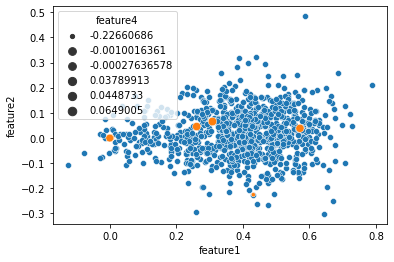

In [56]:
# inputs
feature1 = plot_list1[0:1000]
feature2= plot_list2[0:1000]
feature3= plot_list3
feature4= plot_list4
# convert to pandas dataframe
d = {'feature1': feature1, 'feature2': feature2}
pdnumsqr = pd.DataFrame(d)


d1 = {'feature3': feature3,'feature4': feature4}
pdnumsqr1 = pd.DataFrame(d1)
# plot using lineplot
#sns.set(style='darkgrid')
#sns.lineplot(x='num', y='sqr', data=pdnumsqr)

sns.scatterplot(x='feature1', y='feature2', data=pdnumsqr)
sns.scatterplot(x='feature3', y='feature4', data=pdnumsqr1, size="feature4")

Text(0, 0.5, 'Inertia')

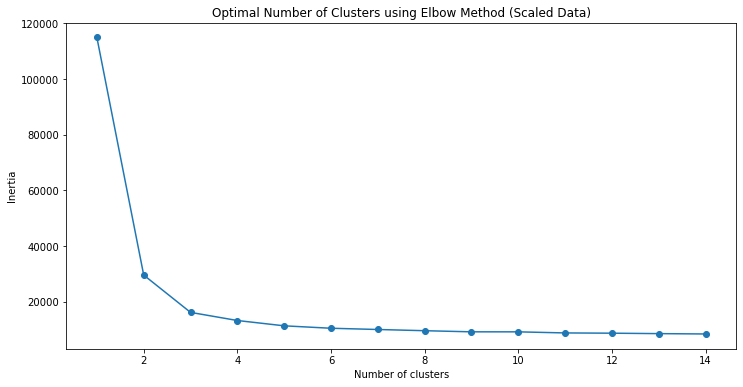

In [57]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [58]:
df_scale2 = X_train
kmeans_scale = KMeans(n_clusters=6, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
#print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

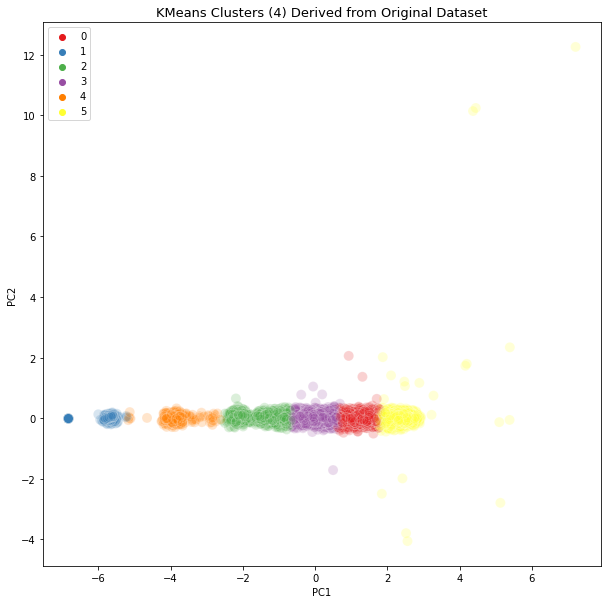

In [60]:
pca2 = PCA(n_components=3).fit(X_train)
pca2d = pca2.transform(X_train)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=13)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

In [62]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='plasma', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [58]:
#applying on given lyrics and  gener and plot the centroides and distances

In [63]:
labels = kmeans_scale.labels_
cluster_center=kmeans_scale.cluster_centers_

In [64]:
labels

array([1, 5, 2, ..., 5, 5, 5])

In [65]:
cluster_center

array([[ 0.41333363,  0.01360699,  0.46987589, ...,  0.69526187,
         0.17962501, -0.04045835],
       [ 0.016228  ,  0.00122328,  0.01963611, ...,  0.02550616,
         0.00678727,  0.00131736],
       [ 0.26810528,  0.01981927,  0.33135432, ...,  0.45085101,
         0.12052065, -0.00383627],
       [ 0.32961142,  0.0202002 ,  0.40656614, ...,  0.57364099,
         0.14974853, -0.01796299],
       [ 0.14603055,  0.01389608,  0.17842913, ...,  0.24189193,
         0.0627121 ,  0.00840998],
       [ 0.47804877,  0.01165827,  0.50628616, ...,  0.80700428,
         0.21852518, -0.06283462]])

In [66]:
pca2 = PCA(n_components=3).fit(cluster_center)
pca2d = pca2.transform(cluster_center)


In [67]:
pca2d 

array([[-2.62174645, -0.03748326,  0.04767281],
       [ 5.15312586, -0.13182024,  0.00967845],
       [-0.01182144,  0.17419574, -0.03242899],
       [-1.37880635,  0.10403955,  0.02790546],
       [ 2.49799202,  0.05379887, -0.01287688],
       [-3.63874362, -0.16273067, -0.03995086]])

In [68]:
pca2d[:,0]

array([-2.62174645,  5.15312586, -0.01182144, -1.37880635,  2.49799202,
       -3.63874362])

In [69]:
pca2d[:,1]

array([-0.03748326, -0.13182024,  0.17419574,  0.10403955,  0.05379887,
       -0.16273067])

In [70]:
x1=[-0.74512204, -1.72255825, -2.44649399,  0.58967775, -1.61222743,
        5.93672397]

In [71]:
y1=[-0.32601324,  2.8299498 , -1.71033171,  0.63813557, -1.13539886,
       -0.29634156]

In [68]:
#each color denotes  each sub gener  

In [69]:
#big green point is new song center point 

In [72]:
label=['rock', 'pop', 'r&b', 'edm',
       'rap', 'latin']

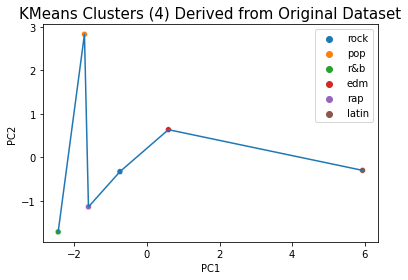

In [73]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1,hue=label).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)

sns.lineplot(x=x1, y=y1)
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])


plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [74]:
labels = kmeans_scale.labels_
cluster_center=kmeans_scale.cluster_centers_

In [75]:
print(cluster_center)

[[ 0.41333363  0.01360699  0.46987589 ...  0.69526187  0.17962501
  -0.04045835]
 [ 0.016228    0.00122328  0.01963611 ...  0.02550616  0.00678727
   0.00131736]
 [ 0.26810528  0.01981927  0.33135432 ...  0.45085101  0.12052065
  -0.00383627]
 [ 0.32961142  0.0202002   0.40656614 ...  0.57364099  0.14974853
  -0.01796299]
 [ 0.14603055  0.01389608  0.17842913 ...  0.24189193  0.0627121
   0.00840998]
 [ 0.47804877  0.01165827  0.50628616 ...  0.80700428  0.21852518
  -0.06283462]]


In [74]:
#all 6 cluster centers are as fallows

In [76]:
cluster_centers=[[-2.17267059, -0.00691348,  0.37222346],
       [ 2.23602704,  0.49275542,  0.01852809],
       [-1.85225801, -0.20164277, -0.16579468],
       [-2.15024764, -0.17338795, -0.09134887],
       [-0.64843033,  0.2587469 , -0.16743853],
       [ 4.58757954, -0.36955813,  0.03383053]]

In [76]:
#distance between consecative centroids

In [77]:
for t in range(len(cluster_centers)-1):
    
    #print(cluster_centers[t])
    
    distance = np.sqrt(np.sum(np.array(cluster_centers[t]) -np.array(cluster_centers[t+1]))**2)
    print(distance)
    

4.554671160000001
4.9670060099999995
0.195289
1.8578624999999998
4.8089739


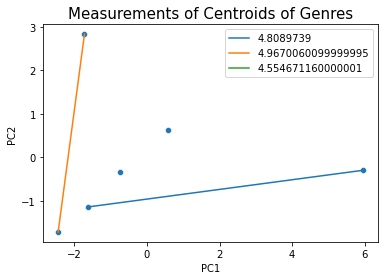

In [78]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1).set_title('Measurements of Centroids of Genres', fontsize=15)
distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))

distance_1_2 = np.sqrt(np.sum(np.array(cluster_centers[1]) -np.array(cluster_centers[2]))**2)
sns.lineplot(x=x1[1:3], y=y1[1:3],legend='brief', label=str(distance_1_2))

distance_0_1 = np.sqrt(np.sum(np.array(cluster_centers[1]) -np.array(cluster_centers[0]))**2)
sns.lineplot(x=x1[0:1], y=y1[0:1],legend='brief', label=str(distance_0_1))

#distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
#sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))

#distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
#sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])


plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [79]:
pca2d[0:2]

array([[-2.62174645, -0.03748326,  0.04767281],
       [ 5.15312586, -0.13182024,  0.00967845]])

In [80]:
pca23 = PCA(n_components=3).fit(X_train)
pca23d = pca23.transform(X_train)

In [81]:
pca2d1 = pca23d

first_list = [row[0] for row in pca2d1]
second_list = [row[1] for row in pca2d1]
third_list = [row[2] for row in pca2d1]

print("First List:", first_list)
print("Second List:", second_list)
print("Third List:", third_list)

First List: [-6.831526297184594, 2.1722028284433383, -0.8147741289716444, 2.2969319081101327, -1.9810415239929173, -6.830398320800018, 0.730636726463896, 1.052890003970291, 2.301700200002725, 1.9790703084284078, 2.098435858671616, -6.831703707812045, 2.3955679879649767, -1.3754812754281653, -0.7229925162873632, -0.9077993994137576, 1.8227687276160334, -3.8731476130434963, 0.865983167067077, 2.5603462385930493, 1.6591819237605119, 0.5598106727185435, -5.673872443974124, 1.2074965972603604, -0.7731924907398753, -1.3803372049587956, 2.2379053966663367, 1.9983649270242876, -0.5188101836734119, -6.829675950197636, -6.830654042504106, 0.43747437893406405, 2.2088719041935274, -3.7335576088094875, -0.5146059662988938, 0.36271538810232207, 1.2567057848424683, 2.2397338955279134, 0.9288755377631626, 2.544045850330448, 2.3945393217171542, 1.7693571213863333, -2.1741076279706792, -0.40066633223005355, 1.2836710646936407, -5.5214867538388015, -0.348416627236287, 2.042832267178519, -0.12048600255070

Third List: [0.14492782739818452, 0.03953441629789034, -0.2861694849289211, 0.11579098288220785, -0.22035638309527028, 0.14467452001507392, -0.08169496899044425, -0.11106903653751578, 0.31100612401819305, 0.18226963449957814, 0.15950632049902247, 0.14622445020234484, -0.023201042594506435, -0.07659685424976206, -0.16783679521209457, 0.003340257720564635, 0.02724288668739778, -0.039752209443795164, -0.06382079217194056, 0.13600618815769486, 0.030821549567639002, 0.039559092021780845, 0.04827963832376136, 0.21221860880619953, 0.03381103155999922, -0.2512015546884134, 0.15934365282957674, 0.048309772457019194, -0.23994769505305535, 0.1452929614030911, 0.14628911701591127, -0.09435740022470879, 0.36563842679629377, 0.13412578632154484, -0.01720896150536766, -0.14051102635092438, 0.15733879170549997, 0.0841531020324813, -0.061231292561676365, 0.40889770900267564, 0.1181931250210129, 0.007395217121878364, -0.173993845543298, -0.19892598937030964, -0.11633445395601727, -0.04326835209113959, 0

In [82]:
len(first_list)

12735

In [83]:
len(labels)

12735

In [84]:
data = {'feature1': first_list, 'feature2': second_list, 'feature3':third_list, 'label': labels}
df3 = pd.DataFrame(data)

In [85]:
df3["label"].unique()

array([1, 5, 2, 0, 4, 3])

In [86]:
df00 = df3[df3['label'] == 0]
df11 = df3[df3['label'] == 1]
df22 = df3[df3['label'] == 2]
df33 = df3[df3['label'] == 3]
df44 = df3[df3['label'] == 4]
df55 = df3[df3['label'] == 5]

In [87]:
print(df11["feature1"].mean())


-6.513216732993904


In [88]:
list_of_avg_cols_df1 = df00.mean().tolist()
list_of_avg_cols_df2 = df11.mean().tolist()
list_of_avg_cols_df3 = df22.mean().tolist()
list_of_avg_cols_df4 = df33.mean().tolist()
list_of_avg_cols_df5 = df44.mean().tolist()
list_of_avg_cols_df6 = df55.mean().tolist()

In [89]:
list_of_avg_cols_df1[0:3]

[1.2599447500479242, -0.0037578397359290306, -0.02912440789948303]

In [90]:
averaged_cluster=[list_of_avg_cols_df1[0:3],
       list_of_avg_cols_df2[0:3],
       list_of_avg_cols_df3[0:3],
       list_of_avg_cols_df4[0:3],
       list_of_avg_cols_df5[0:3],
       list_of_avg_cols_df6[0:3]]

In [91]:
list_of_avg_cols_df6[0:3]

[2.2783893499661896, -0.00916045560974457, 0.09324831372867785]

In [92]:
averaged_cluster

[[1.2599447500479242, -0.0037578397359290306, -0.02912440789948303],
 [-6.513216732993904, -0.006859029675725869, 0.12575558020158986],
 [-1.350882583965823, 0.03294096934085343, -0.17501346148273583],
 [0.01647124685639416, 0.00837771532439611, -0.13639205368544155],
 [-3.8595656649402383, 0.006069100124525497, -0.05482039112347791],
 [2.2783893499661896, -0.00916045560974457, 0.09324831372867785]]

In [93]:
for t in range(len(averaged_cluster)-1):
    
    #print(cluster_centers[t])
    
    distance = np.sqrt(np.sum(np.array(averaged_cluster[t]) -np.array(averaged_cluster[t+1]))**2)
    print(distance)
    

7.621382684880552
4.901365106360334
1.3814119846030541
3.7967738644345395
6.270794164024314


In [94]:
x1=[averaged_cluster[0][0],averaged_cluster[1][0],averaged_cluster[2][0],averaged_cluster[3][0],averaged_cluster[4][0],averaged_cluster[5][0]]

In [95]:
y1=[averaged_cluster[0][1],averaged_cluster[1][1],averaged_cluster[2][1],averaged_cluster[3][1],averaged_cluster[4][1],averaged_cluster[5][1]]

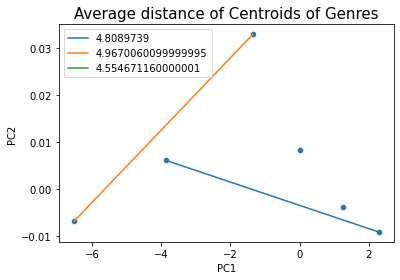

In [106]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1).set_title('Average distance of Centroids of Genres', fontsize=15)
distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))

distance_1_2 = np.sqrt(np.sum(np.array(cluster_centers[1]) -np.array(cluster_centers[2]))**2)
sns.lineplot(x=x1[1:3], y=y1[1:3],legend='brief', label=str(distance_1_2))

distance_0_1 = np.sqrt(np.sum(np.array(cluster_centers[1]) -np.array(cluster_centers[0]))**2)
sns.lineplot(x=x1[0:1], y=y1[0:1],legend='brief', label=str(distance_0_1))

#distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
#sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))

#distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
#sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])


plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

### TSNE Feature vector over the genres and languages

In [97]:
# TODO: recreate the feature vector that contains just
# the musical features in the dataframe, ie, acousticness, mode, 
# dancability, etc. 

features = ["track_popularity", "danceability", "energy", "key",
            "loudness", "mode", "speechiness" ,"acousticness",
            "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

feature_vector = songs_df[features]

In [98]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
w_features = tsne.fit_transform(feature_vector) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18454 samples in 0.268s...
[t-SNE] Computed neighbors for 18454 samples in 1.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18454
[t-SNE] Computed conditional probabilities for sample 2000 / 18454
[t-SNE] Computed conditional probabilities for sample 3000 / 18454
[t-SNE] Computed conditional probabilities for sample 4000 / 18454
[t-SNE] Computed conditional probabilities for sample 5000 / 18454
[t-SNE] Computed conditional probabilities for sample 6000 / 18454
[t-SNE] Computed conditional probabilities for sample 7000 / 18454
[t-SNE] Computed conditional probabilities for sample 8000 / 18454
[t-SNE] Computed conditional probabilities for sample 9000 / 18454
[t-SNE] Computed conditional probabilities for sample 10000 / 18454
[t-SNE] Computed conditional probabilities for sample 11000 / 18454
[t-SNE] Computed conditional probabilities for sample 12000 / 18454
[t-SNE] Computed conditional probabilities for sam

In [99]:
len(w_features)

18454

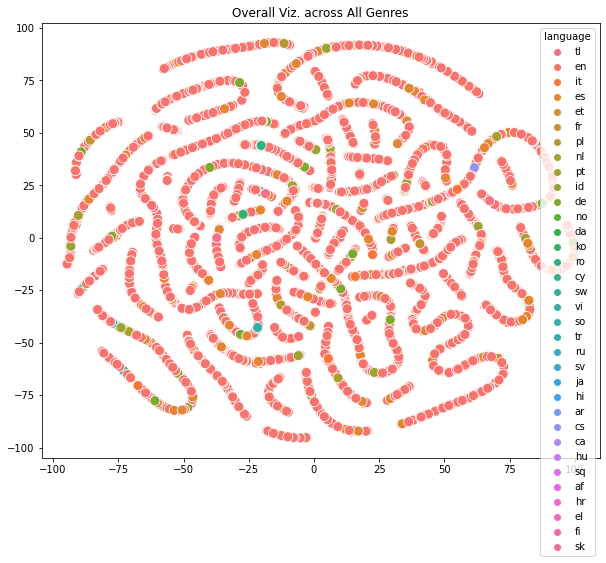

In [101]:
comp0 = w_features[:,0]
comp1 = w_features[:,1]
sns.scatterplot(x=comp0, y=comp1,s=100, hue=songs_df["language"],
                data=feature_vector).set(title="Overall Viz. across All Genres"),
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(10, 8)

### Other visualization over the dataset

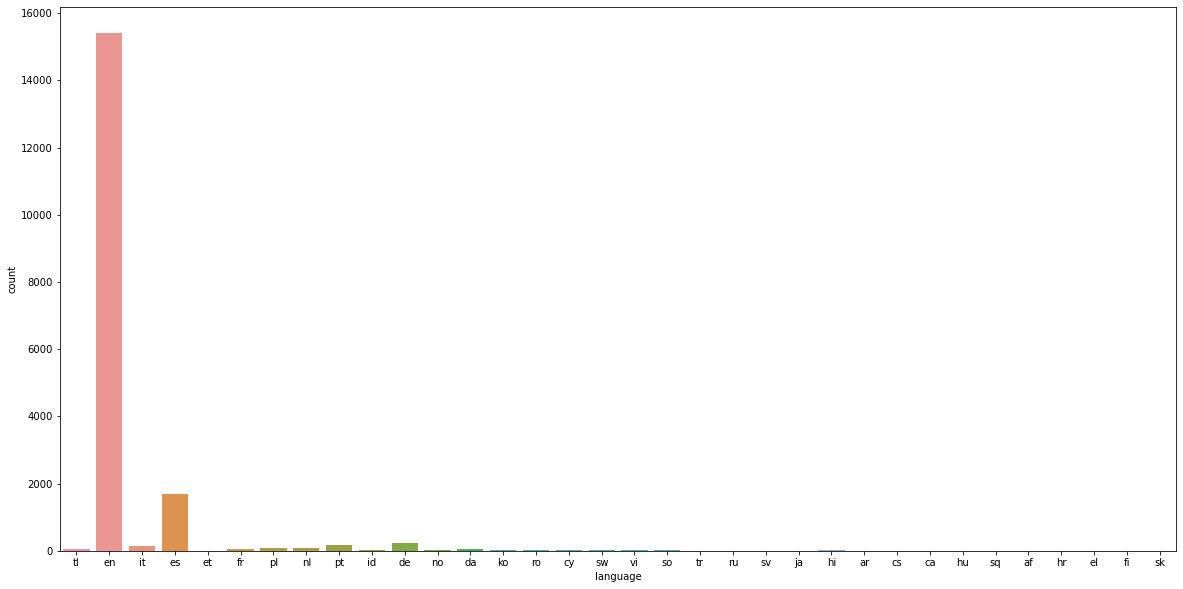

In [102]:
# import seaborn as sns
# import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='language', data=songs_df)

In [103]:
songs_df_en = songs_df[songs_df['language'] == 'en']
songs_df_en['language'].value_counts()

en    15405
Name: language, dtype: int64

<AxesSubplot:>

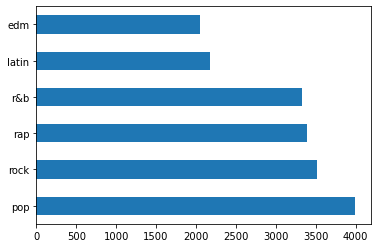

In [104]:
songs_df['playlist_genre'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

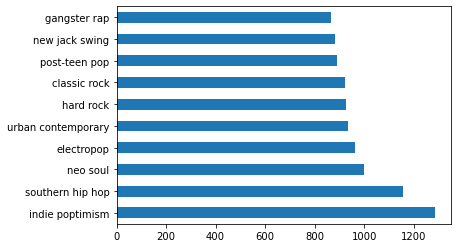

In [105]:
songs_df['playlist_subgenre'].value_counts().head(10).plot(kind='barh')